# Importing the Necessary Libraries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline

# Creating a Pandas DataFrame from a CSV file

In [2]:
#file_name = '../original/D31.csv'
#file_name = '../original/g2-2-50.csv'
#file_name = '../original/g2-2-30.csv'
#dataset_clusters = 2

#file_name = 'noised/g2-2-30.csv'
#file_name = 'evaluation.csv'

#file_name = '../gaussian100.csv'
#file_name = '../CE3/iris.csv'
#file_name = '../CE3/wine.csv'
#file_name = '../CE3/wdbc.csv'
#file_name = '../CE3/glass.csv'

# To get file in "result" folder use "HDBSCAN.py" 
#file_name = '../result2/t4.8k.csv'
#file_name = '../result2/t5.8k.csv'
#file_name = '../result2/t8.8k.csv'
#file_name = '../result2/t7.10k.csv'

file_name = '../result2/g2-2-30.csv'
#file_name = '../result2/varying_densities.csv'


In [3]:
# Overlapped Datasets
#file_name = '../BS3WC-Datasets/overlapped/scene.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-beach.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-sunset.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-fall.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-field.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-mountain.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-urban.csv'

#file_name = '../BS3WC-Datasets/overlapped/birds.csv'

# Systhetic Datasets
#file_name = '../BS3WC-Datasets/Synthetic/a3.txt'
#file_name = '../BS3WC-Datasets/Synthetic/Aggregation.txt'
#file_name = '../BS3WC-Datasets/Synthetic/Compound.txt'
#file_name = '../BS3WC-Datasets/Synthetic/dim128.txt'
#file_name = '../BS3WC-Datasets/Synthetic/dim512.txt'
#file_name = '../BS3WC-Datasets/Synthetic/flame.txt'
#file_name = '../BS3WC-Datasets/Synthetic/jain.txt'
#file_name = '../BS3WC-Datasets/Synthetic/pathbased.txt'
#file_name = '../BS3WC-Datasets/Synthetic/R15.txt'
#file_name = '../BS3WC-Datasets/Synthetic/s1.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/s2.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/spiral.txt'
#file_name = '../BS3WC-Datasets/Synthetic/unbalance.txt'
#dataset_clusters = 8

# Real Datasets
#file_name = '../BS3WC-Datasets/Real/CNAE-9.data'
#file_name = '../BS3WC-Datasets/Real/dermatology.data'
#file_name = '../BS3WC-Datasets/Real/ecoli.data'
#file_name = '../BS3WC-Datasets/Real/glass.data'
#file_name = '../BS3WC-Datasets/Real/iris.data'
#file_name = '../BS3WC-Datasets/Real/seeds_dataset.data'
#file_name = '../BS3WC-Datasets/Real/segmentation.data'
#file_name = '../BS3WC-Datasets/Real/thyroid0387.data'
#file_name = '../BS3WC-Datasets/Real/waveform.data'
#file_name = '../BS3WC-Datasets/Real/waveform2.data'
#file_name = '../BS3WC-Datasets/Real/wdbc.data'
#file_name = '../BS3WC-Datasets/Real/wine.data'
#file_name = '../BS3WC-Datasets/Real/yeast.data'


In [4]:
data = pd.read_csv(file_name)

In [5]:
folder_name = '../images-visual'
#folder_name = '../images-visual'
split_arr = file_name.split('/')
if '.csv' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
if '.txt' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.txt','').lower()
    
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')
print(identity_name)

file_measures = "../Measurements/" + identity_name + "-measures.txt"
open(file_measures,"w+")

g2-2-30


<_io.TextIOWrapper name='../Measurements/g2-2-30-measures.txt' mode='w+' encoding='UTF-8'>

In [6]:
from sklearn.metrics.cluster import normalized_mutual_info_score
    
def calculate_NMI(inside_points, labels, ground_truth, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    nmi = normalized_mutual_info_score(X, Y)
    print("Normalized Mutual Information (" + caption + "): %0.4f"% nmi)
    file.write("Normalized Mutual Information (" + caption + "): %0.4f\n"% nmi)


In [7]:
#calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [8]:
from sklearn.metrics.cluster import adjusted_rand_score

def calculate_ARI(inside_points, labels, ground_truth, file_name, caption, no_outliers=False):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    ari = adjusted_rand_score(X, Y)
    
    print("Adjusted Random Index (" + caption + "): %0.4f"% ari)
    file.write("Adjusted Random Index (" + caption + "): %0.4f\n"% ari)


In [9]:
#calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [10]:
def calculate_db_index(inside_points, labels, file_name, caption):
    from sklearn.metrics import davies_bouldin_score 
    import sklearn
    file = open(file_name, "a+")
    
    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    db_index = davies_bouldin_score(X, Y)
    print("DB Index Score (" + caption + "): %0.4f\n"% db_index)
    file.write("DB Index Score (" + caption + "): %0.4f\n"% db_index)

In [11]:
#calculate_db_index(final_inside, clusters_labels, file_measures)

In [12]:
def calculate_silhouette_score(inside_points, labels, file_name, caption):
    file = open(file_name, "a+")

    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    #X = np.array(X)
    #Y = np.array(Y)
    
    silhouette_coef = metrics.silhouette_score(X, Y)
    print("Silhouette Coefficient (" + caption + "): %0.4f"% silhouette_coef)
    file.write("Silhouette Coefficient (" + caption + "): %0.4f\n"% silhouette_coef)


In [13]:
def calculate_accuracy(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")

    X = []
    Y = []
    
    correct = 0
    #total = len(dataset)
    #for index, o_c in dataset.iterrows():
    #    key = tuple(o_c[features])
    #    if key in labels:
    #        if labels[key] == o_c['L']:
    #            correct += 1

    total = len(inside_points)
    for f in inside_points:
        if labels[f] == ground_truth[f]:
            correct += 1
    
    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)
        
    print("Accuracy Score (" + caption + "): %0.4f"% accuracy)
    file.write("Accuracy Score (" + caption + "): %0.4f\n"% accuracy)

#calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures)

In [14]:
def calculate_confusion_matrix(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")
    
    unique_labels = np.unique(dataset['L'])
    confusion_matrices = {}
    
    print("length: ", len(inside_points))
    X = []
    Y = []
    
    for lab in unique_labels:
        confusion_matrices[lab] = [0,0,0,0]

    correct = 0
    total = len(dataset)
    for index, o_c in dataset.iterrows():
        key = tuple(o_c[features])
        if key in labels:
            if labels[key] == o_c['L']:
                confusion_matrices[o_c['L']][0] += 1
            
                for lab in unique_labels:
                    if lab != o_c['L']:
                        confusion_matrices[lab][3] += 1
            else:
                if labels[key] == -1:
                    #continue # To check confusion matrix for other than outliers                    
                    for lab in unique_labels:
                        confusion_matrices[lab][2] += 1
                else:
                    confusion_matrices[labels[key]][1] += 1
            
                    for lab in unique_labels:
                        if lab != labels[key]:
                            confusion_matrices[lab][2] += 1

    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)*100

    print("Confusion Matrices (" + caption + "): " + str(confusion_matrices) )
    file.write("Confusion Matrices (" + caption + "): " + str(confusion_matrices) + "\n")

#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures)

# Data Description


In [15]:
def write_outliers_detected(final_inside,final_partial,final_outside,file_name, caption):
    file = open(file_name, "a+")
    file.write("Total Objects (" + caption + "): %0.4f\n"% (len(final_inside)+len(final_partial)+len(final_outside)))
    file.write("Outliers Detected By BS3 (" + caption + "): %0.4f\n"% (len(final_outside)+len(final_partial)))

In [16]:
data.head()

Col1   Col2    L
0  500.0  537.0  0.0
1  522.0  507.0  0.0
2  515.0  500.0  0.0
3  509.0  475.0  0.0
4  562.0  495.0  0.0

In [17]:
data.shape

(1883, 3)

# Data Sampling

In [18]:
#sampled_df = data[(data['Col1']/data['Col1']) == 1]
sampled_df = data
sampled_df.shape

(1883, 3)

In [19]:
sampled_df.head()

Col1   Col2    L
0  500.0  537.0  0.0
1  522.0  507.0  0.0
2  515.0  500.0  0.0
3  509.0  475.0  0.0
4  562.0  495.0  0.0

In [20]:
import csv

def write_to_file(file_name, values, header_names=False):
    with open(file_name, 'w') as writeFile:
        writer = csv.writer(writeFile)
        if header_names:
            writer.writerow(header_names)
        writer.writerows(values)
        

# Statistics


In [21]:
sampled_df.describe().transpose()


count        mean        std    min    25%    50%    75%    max
Col1  1883.0  549.361179  57.265562  436.0  499.0  545.0  600.0  672.0
Col2  1883.0  550.064259  55.658636  430.0  501.0  551.0  600.0  659.0
L     1883.0    0.505045   0.500107    0.0    0.0    1.0    1.0    1.0

# Select Features of Interest for Clustering


In [22]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

elif 'dermatology' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30',
                'Col31', 'Col32', 'Col33', 'Col34']

#GLASS Dataset -OR- Nine Featured datasets
elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

elif 'scene' in file_name:
    features = ['Col'+str(i+1) for i in range(294)]

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']

select_df_test_flag = False
if 'Out' in sampled_df:
    select_df = sampled_df[sampled_df['Out'] == 1][features]
    select_df_test = sampled_df[sampled_df['Out'] != 1][features]
    select_df_test_out = sampled_df[sampled_df['Out'] == 3][features]
    select_df_test_flag = True
else:
    select_df = sampled_df[features]

#X = StandardScaler().fit_transform(select_df)
print(features)

../result2/g2-2-30.csv
['Col1', 'Col2']


In [23]:
print(select_df.shape)
if select_df_test_flag:
    print(select_df_test.shape)

(1883, 2)


In [24]:
select_df.head()

Col1   Col2
0  500.0  537.0
1  522.0  507.0
2  515.0  500.0
3  509.0  475.0
4  562.0  495.0

In [25]:
num_of_clusters = 0

In [26]:
label_col_name = 'L'
#sampled_df.drop('L', axis=1, inplace=True)
sampled_df

Col1   Col2    L
0     500.0  537.0  0.0
1     522.0  507.0  0.0
2     515.0  500.0  0.0
3     509.0  475.0  0.0
4     562.0  495.0  0.0
...     ...    ...  ...
1878  651.0  605.0  1.0
1879  535.0  609.0  1.0
1880  594.0  575.0  1.0
1881  609.0  614.0  1.0
1882  487.0  527.0  0.0

[1883 rows x 3 columns]

In [27]:
if 'L' in sampled_df:
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    clusters_labels = np.unique(sampled_df['L'])
    print(clusters_labels)
    num_of_clusters = len(clusters_labels)

else:    
    num_of_clusters = dataset_clusters
    #X = StandardScaler().fit_transform(select_df)
    kmeans = KMeans(n_clusters=num_of_clusters)
    model = kmeans.fit_predict(select_df)
    centroids = np.unique(kmeans.cluster_centers_)
    clusters_labels = kmeans.labels_
    
    print("Centroids: ", centroids)
    print("model\n", model)
    #plt.scatter(X[:, 0], X[:, 1], c=model)
    plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
    plt.title("KMean Clusters")
    plt.show()

    sampled_df['L'] = kmeans.labels_
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    

[0. 1.]
[0. 1.]
[0. 1.]


In [28]:
sampled_df

Col1   Col2    L
0     500.0  537.0  0.0
1     522.0  507.0  0.0
2     515.0  500.0  0.0
3     509.0  475.0  0.0
4     562.0  495.0  0.0
...     ...    ...  ...
1878  651.0  605.0  1.0
1879  535.0  609.0  1.0
1880  594.0  575.0  1.0
1881  609.0  614.0  1.0
1882  487.0  527.0  0.0

[1883 rows x 3 columns]

In [29]:
sampled_df.head()

Col1   Col2    L
0  500.0  537.0  0.0
1  522.0  507.0  0.0
2  515.0  500.0  0.0
3  509.0  475.0  0.0
4  562.0  495.0  0.0

In [30]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if len(final_list) > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

In [31]:
def plot_custom_clusters_2(c_k_o_i, clusters_labels, size, description, image_name, alpha=1, beta=0, not_outlier=False):
    X = np.array(select_df)
    for i in range(c_k_o_i.shape[0]):
        
        if c_k_o_i[i][0] >= 0:
            R = c_k_o_i[i][0]
        else:
            R = 0
        
        if c_k_o_i[i][1] >= 0:
            G = c_k_o_i[i][1]
        else:
            G = 0
        
        # For Normalized
        if G == 1:
            G -= 0.09
        col = (0, 1-G, 0)
        
        #G -= 0.2
        #col = (0.25, 1-G**4, 0.25)
        #col = (0.25+(0.5-G**4) if G<=0.9 else 0.25, 1-G**6, 0.25+(0.5-G**4) if G<=0.9 else 0.25)
        #col = (0.25+(0.5-G**2) if G<=0.7 else 0.25, 1-G**2, 0.25+(0.5-G**2) if G<=0.7 else 0.25)
        plt.plot(X[i][0], X[i][1], '.', color=col)
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig(image_name + '.pdf', dpi=1500)  
    

In [32]:
#c_k_o_i

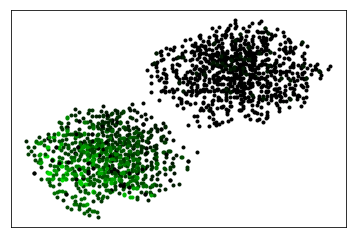

In [139]:
# Method 1
#color = [[1,0,0], [0,1,0], [0,0,1]]
#plot_custom_clusters_2(c_k_o_i, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result')
plot_custom_clusters_2(c_k_o_i_norm, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result')
#plot_custom_clusters_2(c_k_o_i_min, clusters_labels, 5, colors, "Normal Evaluation 3: ", folder_name + '/' + identity_name + '-normal-result')


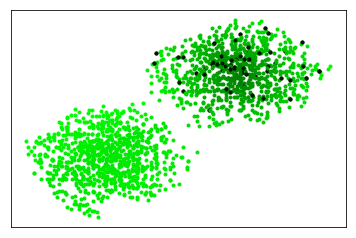

In [140]:
# Method 2
#color = [[1,0,0], [0,1,0], [0,0,1]]
#plot_custom_clusters_2(c_k_o_i_2, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')
plot_custom_clusters_2(c_k_o_i_2_norm, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')
#plot_custom_clusters_2(c_k_o_i_2_min, clusters_labels, 5, colors, "Normal Evaluation 3: ", folder_name + '/' + identity_name + '-normal-result2')


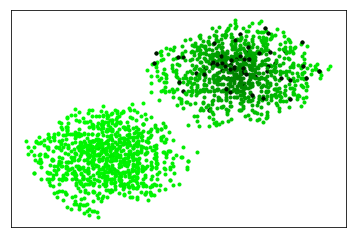

In [142]:
# Method 3
#color = [[1,0,0], [0,1,0], [0,0,1]]
#plot_custom_clusters_2(c_k_o_i_3, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result3')
plot_custom_clusters_2(c_k_o_i_3, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result3')
#plot_custom_clusters_2(c_k_o_i_3_min, clusters_labels, 5, colors, "Normal Evaluation 3: ", folder_name + '/' + identity_name + '-normal-result23')


In [36]:
sigma_multiples = 4

In [37]:
sampled_df.shape


(1883, 3)

In [38]:
sampled_df.describe().transpose()


count        mean        std    min    25%    50%    75%    max
Col1  1883.0  549.361179  57.265562  436.0  499.0  545.0  600.0  672.0
Col2  1883.0  550.064259  55.658636  430.0  501.0  551.0  600.0  659.0
L     1883.0    0.505045   0.500107    0.0    0.0    1.0    1.0    1.0

In [39]:
print(len(sampled_df[sampled_df.L == 0]))
print(len(sampled_df[sampled_df.L == 1]))

932
951



# From Here Started Our Method

In [40]:
label_col_name = 'L'
#num_neighbors = 7
num_neighbors = len(select_df)
print(len(select_df))

1883


In [41]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors, return_distance=True)  

In [42]:
#knn[0] # Distances with neighbors
#knn[1]  # Indices of neighbours
#select_df.head()    
#knn[0].shape


In [43]:
row_neighbors_list_1 = {}
row_neighbors_dist_1 = {}

for i in range(knn[0].shape[0]):
    row_neighbors_list_1[i] = knn[1][i]
    row_neighbors_dist_1[i] = knn[0][i]
    #print(i, knn[i])


In [44]:
#row_neighbors_list_1

In [45]:
#row_neighbors_dist_1
clusters_labelss = np.unique(sampled_df[label_col_name])
for clusters_label in clusters_labelss:
    print(clusters_label)

0.0
1.0


In [46]:
def getNearestEvaluationValues(dataset, dataset_neighbors_indices, dataset_neighbors_dist, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    for index in dataset_neighbors_indices:
        print(index)
        for clusters_label in clusters_labels:
            print("New clusters_label__________ ", clusters_label)
            nearest_cluster_flage = False
            nearest_non_cluster_flage = False
            
            nearest_cluster_dist = -1
            nearest_non_cluster_dist = -1
            
            clusters_label = int(clusters_label)
            for i in range(num_neighbors):
                dataset_index = dataset_neighbors_indices[index][i]
                dataset_distance = dataset_neighbors_dist[index][i]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                
                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label and not nearest_cluster_flage:
                    nearest_cluster_flage = True
                    nearest_cluster_dist = dataset_distance
                    
                    #print("Nearest Cluster Flage and Distance")
                    #print(nearest_cluster_flage)
                    #print(nearest_cluster_dist)
                
                
                if neighbor_label != clusters_label and not nearest_non_cluster_flage:
                    nearest_non_cluster_flage = True
                    nearest_non_cluster_dist = dataset_distance
                
                    #print("Nearest Non-Cluster Flage and Distance")
                    #print(nearest_non_cluster_flage)
                    #print(nearest_non_cluster_dist)

                #print("Cluster Label and Neighbor Label")
                #print(clusters_label)
                #print(neighbor_label)
                
                
                if nearest_cluster_flage and nearest_non_cluster_flage:
                    break
            
            #print("_************************************************_")
            #print(nearest_cluster_dist)
            #print(nearest_non_cluster_dist)
            
            if nearest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1
            
            elif nearest_non_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = -1
            
            else:
                c_k_o_i[index][int(clusters_label)] = 1 - (nearest_cluster_dist/nearest_non_cluster_dist)
                
                #print(c_k_o_i[index][int(clusters_label)])

    return (c_k_o_i)


In [47]:
c_k_o_i = getNearestEvaluationValues(sampled_df, row_neighbors_list_1, row_neighbors_dist_1, label_col_name)

[0. 1.]
0
New clusters_label__________  0.0
New clusters_label__________  1.0
1
New clusters_label__________  0.0
New clusters_label__________  1.0
2
New clusters_label__________  0.0
New clusters_label__________  1.0
3
New clusters_label__________  0.0
New clusters_label__________  1.0
4
New clusters_label__________  0.0
New clusters_label__________  1.0
5
New clusters_label__________  0.0
New clusters_label__________  1.0
6
New clusters_label__________  0.0
New clusters_label__________  1.0
7
New clusters_label__________  0.0
New clusters_label__________  1.0
8
New clusters_label__________  0.0
New clusters_label__________  1.0
9
New clusters_label__________  0.0
New clusters_label__________  1.0
10
New clusters_label__________  0.0
New clusters_label__________  1.0
11
New clusters_label__________  0.0
New clusters_label__________  1.0
12
New clusters_label__________  0.0
New clusters_label__________  1.0
13
New clusters_label__________  0.0
New clusters_label__________  1.0
14
New c

New clusters_label__________  1.0
117
New clusters_label__________  0.0
New clusters_label__________  1.0
118
New clusters_label__________  0.0
New clusters_label__________  1.0
119
New clusters_label__________  0.0
New clusters_label__________  1.0
120
New clusters_label__________  0.0
New clusters_label__________  1.0
121
New clusters_label__________  0.0
New clusters_label__________  1.0
122
New clusters_label__________  0.0
New clusters_label__________  1.0
123
New clusters_label__________  0.0
New clusters_label__________  1.0
124
New clusters_label__________  0.0
New clusters_label__________  1.0
125
New clusters_label__________  0.0
New clusters_label__________  1.0
126
New clusters_label__________  0.0
New clusters_label__________  1.0
127
New clusters_label__________  0.0
New clusters_label__________  1.0
128
New clusters_label__________  0.0
New clusters_label__________  1.0
129
New clusters_label__________  0.0
New clusters_label__________  1.0
130
New clusters_label________

231
New clusters_label__________  0.0
New clusters_label__________  1.0
232
New clusters_label__________  0.0
New clusters_label__________  1.0
233
New clusters_label__________  0.0
New clusters_label__________  1.0
234
New clusters_label__________  0.0
New clusters_label__________  1.0
235
New clusters_label__________  0.0
New clusters_label__________  1.0
236
New clusters_label__________  0.0
New clusters_label__________  1.0
237
New clusters_label__________  0.0
New clusters_label__________  1.0
238
New clusters_label__________  0.0
New clusters_label__________  1.0
239
New clusters_label__________  0.0
New clusters_label__________  1.0
240
New clusters_label__________  0.0
New clusters_label__________  1.0
241
New clusters_label__________  0.0
New clusters_label__________  1.0
242
New clusters_label__________  0.0
New clusters_label__________  1.0
243
New clusters_label__________  0.0
New clusters_label__________  1.0
244
New clusters_label__________  0.0
New clusters_label________

New clusters_label__________  1.0
346
New clusters_label__________  0.0
New clusters_label__________  1.0
347
New clusters_label__________  0.0
New clusters_label__________  1.0
348
New clusters_label__________  0.0
New clusters_label__________  1.0
349
New clusters_label__________  0.0
New clusters_label__________  1.0
350
New clusters_label__________  0.0
New clusters_label__________  1.0
351
New clusters_label__________  0.0
New clusters_label__________  1.0
352
New clusters_label__________  0.0
New clusters_label__________  1.0
353
New clusters_label__________  0.0
New clusters_label__________  1.0
354
New clusters_label__________  0.0
New clusters_label__________  1.0
355
New clusters_label__________  0.0
New clusters_label__________  1.0
356
New clusters_label__________  0.0
New clusters_label__________  1.0
357
New clusters_label__________  0.0
New clusters_label__________  1.0
358
New clusters_label__________  0.0
New clusters_label__________  1.0
359
New clusters_label________

New clusters_label__________  1.0
460
New clusters_label__________  0.0
New clusters_label__________  1.0
461
New clusters_label__________  0.0
New clusters_label__________  1.0
462
New clusters_label__________  0.0
New clusters_label__________  1.0
463
New clusters_label__________  0.0
New clusters_label__________  1.0
464
New clusters_label__________  0.0
New clusters_label__________  1.0
465
New clusters_label__________  0.0
New clusters_label__________  1.0
466
New clusters_label__________  0.0
New clusters_label__________  1.0
467
New clusters_label__________  0.0
New clusters_label__________  1.0
468
New clusters_label__________  0.0
New clusters_label__________  1.0
469
New clusters_label__________  0.0
New clusters_label__________  1.0
470
New clusters_label__________  0.0
New clusters_label__________  1.0
471
New clusters_label__________  0.0
New clusters_label__________  1.0
472
New clusters_label__________  0.0
New clusters_label__________  1.0
473
New clusters_label________

574
New clusters_label__________  0.0
New clusters_label__________  1.0
575
New clusters_label__________  0.0
New clusters_label__________  1.0
576
New clusters_label__________  0.0
New clusters_label__________  1.0
577
New clusters_label__________  0.0
New clusters_label__________  1.0
578
New clusters_label__________  0.0
New clusters_label__________  1.0
579
New clusters_label__________  0.0
New clusters_label__________  1.0
580
New clusters_label__________  0.0
New clusters_label__________  1.0
581
New clusters_label__________  0.0
New clusters_label__________  1.0
582
New clusters_label__________  0.0
New clusters_label__________  1.0
583
New clusters_label__________  0.0
New clusters_label__________  1.0
584
New clusters_label__________  0.0
New clusters_label__________  1.0
585
New clusters_label__________  0.0
New clusters_label__________  1.0
586
New clusters_label__________  0.0
New clusters_label__________  1.0
587
New clusters_label__________  0.0
New clusters_label________

New clusters_label__________  1.0
690
New clusters_label__________  0.0
New clusters_label__________  1.0
691
New clusters_label__________  0.0
New clusters_label__________  1.0
692
New clusters_label__________  0.0
New clusters_label__________  1.0
693
New clusters_label__________  0.0
New clusters_label__________  1.0
694
New clusters_label__________  0.0
New clusters_label__________  1.0
695
New clusters_label__________  0.0
New clusters_label__________  1.0
696
New clusters_label__________  0.0
New clusters_label__________  1.0
697
New clusters_label__________  0.0
New clusters_label__________  1.0
698
New clusters_label__________  0.0
New clusters_label__________  1.0
699
New clusters_label__________  0.0
New clusters_label__________  1.0
700
New clusters_label__________  0.0
New clusters_label__________  1.0
701
New clusters_label__________  0.0
New clusters_label__________  1.0
702
New clusters_label__________  0.0
New clusters_label__________  1.0
703
New clusters_label________

New clusters_label__________  1.0
805
New clusters_label__________  0.0
New clusters_label__________  1.0
806
New clusters_label__________  0.0
New clusters_label__________  1.0
807
New clusters_label__________  0.0
New clusters_label__________  1.0
808
New clusters_label__________  0.0
New clusters_label__________  1.0
809
New clusters_label__________  0.0
New clusters_label__________  1.0
810
New clusters_label__________  0.0
New clusters_label__________  1.0
811
New clusters_label__________  0.0
New clusters_label__________  1.0
812
New clusters_label__________  0.0
New clusters_label__________  1.0
813
New clusters_label__________  0.0
New clusters_label__________  1.0
814
New clusters_label__________  0.0
New clusters_label__________  1.0
815
New clusters_label__________  0.0
New clusters_label__________  1.0
816
New clusters_label__________  0.0
New clusters_label__________  1.0
817
New clusters_label__________  0.0
New clusters_label__________  1.0
818
New clusters_label________

919
New clusters_label__________  0.0
New clusters_label__________  1.0
920
New clusters_label__________  0.0
New clusters_label__________  1.0
921
New clusters_label__________  0.0
New clusters_label__________  1.0
922
New clusters_label__________  0.0
New clusters_label__________  1.0
923
New clusters_label__________  0.0
New clusters_label__________  1.0
924
New clusters_label__________  0.0
New clusters_label__________  1.0
925
New clusters_label__________  0.0
New clusters_label__________  1.0
926
New clusters_label__________  0.0
New clusters_label__________  1.0
927
New clusters_label__________  0.0
New clusters_label__________  1.0
928
New clusters_label__________  0.0
New clusters_label__________  1.0
929
New clusters_label__________  0.0
New clusters_label__________  1.0
930
New clusters_label__________  0.0
New clusters_label__________  1.0
931
New clusters_label__________  0.0
New clusters_label__________  1.0
932
New clusters_label__________  0.0
New clusters_label________

New clusters_label__________  1.0
1035
New clusters_label__________  0.0
New clusters_label__________  1.0
1036
New clusters_label__________  0.0
New clusters_label__________  1.0
1037
New clusters_label__________  0.0
New clusters_label__________  1.0
1038
New clusters_label__________  0.0
New clusters_label__________  1.0
1039
New clusters_label__________  0.0
New clusters_label__________  1.0
1040
New clusters_label__________  0.0
New clusters_label__________  1.0
1041
New clusters_label__________  0.0
New clusters_label__________  1.0
1042
New clusters_label__________  0.0
New clusters_label__________  1.0
1043
New clusters_label__________  0.0
New clusters_label__________  1.0
1044
New clusters_label__________  0.0
New clusters_label__________  1.0
1045
New clusters_label__________  0.0
New clusters_label__________  1.0
1046
New clusters_label__________  0.0
New clusters_label__________  1.0
1047
New clusters_label__________  0.0
New clusters_label__________  1.0
1048
New clusters

1147
New clusters_label__________  0.0
New clusters_label__________  1.0
1148
New clusters_label__________  0.0
New clusters_label__________  1.0
1149
New clusters_label__________  0.0
New clusters_label__________  1.0
1150
New clusters_label__________  0.0
New clusters_label__________  1.0
1151
New clusters_label__________  0.0
New clusters_label__________  1.0
1152
New clusters_label__________  0.0
New clusters_label__________  1.0
1153
New clusters_label__________  0.0
New clusters_label__________  1.0
1154
New clusters_label__________  0.0
New clusters_label__________  1.0
1155
New clusters_label__________  0.0
New clusters_label__________  1.0
1156
New clusters_label__________  0.0
New clusters_label__________  1.0
1157
New clusters_label__________  0.0
New clusters_label__________  1.0
1158
New clusters_label__________  0.0
New clusters_label__________  1.0
1159
New clusters_label__________  0.0
New clusters_label__________  1.0
1160
New clusters_label__________  0.0
New clusters

New clusters_label__________  1.0
1261
New clusters_label__________  0.0
New clusters_label__________  1.0
1262
New clusters_label__________  0.0
New clusters_label__________  1.0
1263
New clusters_label__________  0.0
New clusters_label__________  1.0
1264
New clusters_label__________  0.0
New clusters_label__________  1.0
1265
New clusters_label__________  0.0
New clusters_label__________  1.0
1266
New clusters_label__________  0.0
New clusters_label__________  1.0
1267
New clusters_label__________  0.0
New clusters_label__________  1.0
1268
New clusters_label__________  0.0
New clusters_label__________  1.0
1269
New clusters_label__________  0.0
New clusters_label__________  1.0
1270
New clusters_label__________  0.0
New clusters_label__________  1.0
1271
New clusters_label__________  0.0
New clusters_label__________  1.0
1272
New clusters_label__________  0.0
New clusters_label__________  1.0
1273
New clusters_label__________  0.0
New clusters_label__________  1.0
1274
New clusters

1373
New clusters_label__________  0.0
New clusters_label__________  1.0
1374
New clusters_label__________  0.0
New clusters_label__________  1.0
1375
New clusters_label__________  0.0
New clusters_label__________  1.0
1376
New clusters_label__________  0.0
New clusters_label__________  1.0
1377
New clusters_label__________  0.0
New clusters_label__________  1.0
1378
New clusters_label__________  0.0
New clusters_label__________  1.0
1379
New clusters_label__________  0.0
New clusters_label__________  1.0
1380
New clusters_label__________  0.0
New clusters_label__________  1.0
1381
New clusters_label__________  0.0
New clusters_label__________  1.0
1382
New clusters_label__________  0.0
New clusters_label__________  1.0
1383
New clusters_label__________  0.0
New clusters_label__________  1.0
1384
New clusters_label__________  0.0
New clusters_label__________  1.0
1385
New clusters_label__________  0.0
New clusters_label__________  1.0
1386
New clusters_label__________  0.0
New clusters

1486
New clusters_label__________  0.0
New clusters_label__________  1.0
1487
New clusters_label__________  0.0
New clusters_label__________  1.0
1488
New clusters_label__________  0.0
New clusters_label__________  1.0
1489
New clusters_label__________  0.0
New clusters_label__________  1.0
1490
New clusters_label__________  0.0
New clusters_label__________  1.0
1491
New clusters_label__________  0.0
New clusters_label__________  1.0
1492
New clusters_label__________  0.0
New clusters_label__________  1.0
1493
New clusters_label__________  0.0
New clusters_label__________  1.0
1494
New clusters_label__________  0.0
New clusters_label__________  1.0
1495
New clusters_label__________  0.0
New clusters_label__________  1.0
1496
New clusters_label__________  0.0
New clusters_label__________  1.0
1497
New clusters_label__________  0.0
New clusters_label__________  1.0
1498
New clusters_label__________  0.0
New clusters_label__________  1.0
1499
New clusters_label__________  0.0
New clusters

1599
New clusters_label__________  0.0
New clusters_label__________  1.0
1600
New clusters_label__________  0.0
New clusters_label__________  1.0
1601
New clusters_label__________  0.0
New clusters_label__________  1.0
1602
New clusters_label__________  0.0
New clusters_label__________  1.0
1603
New clusters_label__________  0.0
New clusters_label__________  1.0
1604
New clusters_label__________  0.0
New clusters_label__________  1.0
1605
New clusters_label__________  0.0
New clusters_label__________  1.0
1606
New clusters_label__________  0.0
New clusters_label__________  1.0
1607
New clusters_label__________  0.0
New clusters_label__________  1.0
1608
New clusters_label__________  0.0
New clusters_label__________  1.0
1609
New clusters_label__________  0.0
New clusters_label__________  1.0
1610
New clusters_label__________  0.0
New clusters_label__________  1.0
1611
New clusters_label__________  0.0
New clusters_label__________  1.0
1612
New clusters_label__________  0.0
New clusters

1712
New clusters_label__________  0.0
New clusters_label__________  1.0
1713
New clusters_label__________  0.0
New clusters_label__________  1.0
1714
New clusters_label__________  0.0
New clusters_label__________  1.0
1715
New clusters_label__________  0.0
New clusters_label__________  1.0
1716
New clusters_label__________  0.0
New clusters_label__________  1.0
1717
New clusters_label__________  0.0
New clusters_label__________  1.0
1718
New clusters_label__________  0.0
New clusters_label__________  1.0
1719
New clusters_label__________  0.0
New clusters_label__________  1.0
1720
New clusters_label__________  0.0
New clusters_label__________  1.0
1721
New clusters_label__________  0.0
New clusters_label__________  1.0
1722
New clusters_label__________  0.0
New clusters_label__________  1.0
1723
New clusters_label__________  0.0
New clusters_label__________  1.0
1724
New clusters_label__________  0.0
New clusters_label__________  1.0
1725
New clusters_label__________  0.0
New clusters

1825
New clusters_label__________  0.0
New clusters_label__________  1.0
1826
New clusters_label__________  0.0
New clusters_label__________  1.0
1827
New clusters_label__________  0.0
New clusters_label__________  1.0
1828
New clusters_label__________  0.0
New clusters_label__________  1.0
1829
New clusters_label__________  0.0
New clusters_label__________  1.0
1830
New clusters_label__________  0.0
New clusters_label__________  1.0
1831
New clusters_label__________  0.0
New clusters_label__________  1.0
1832
New clusters_label__________  0.0
New clusters_label__________  1.0
1833
New clusters_label__________  0.0
New clusters_label__________  1.0
1834
New clusters_label__________  0.0
New clusters_label__________  1.0
1835
New clusters_label__________  0.0
New clusters_label__________  1.0
1836
New clusters_label__________  0.0
New clusters_label__________  1.0
1837
New clusters_label__________  0.0
New clusters_label__________  1.0
1838
New clusters_label__________  0.0
New clusters

In [48]:
print(np.max(c_k_o_i))
print(np.min(c_k_o_i))

max_val = np.max(c_k_o_i)
min_val = np.min(c_k_o_i)
c_k_o_i_norm = np.zeros((len(sampled_df),len(clusters_labels)))

for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        c_k_o_i_norm[i][j] = (c_k_o_i[i][j] - min_val)/ (max_val - min_val)
        
print(np.max(c_k_o_i_norm))
print(np.min(c_k_o_i_norm))


1.0
-131.9661611087573
1.0
0.0


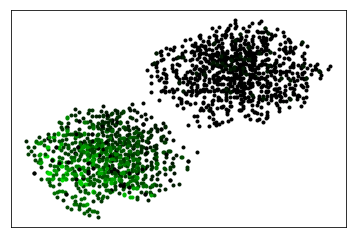

In [49]:
# Not Normalized
#plot_custom_clusters_2(c_k_o_i, clusters_labels, 5, "Normal Evaluation 1: ", folder_name + '/' + identity_name + '-normal-result')

# Normalized
plot_custom_clusters_2(c_k_o_i_norm, clusters_labels, 5, "Normal Evaluation 1: ", folder_name + '/' + identity_name + '-normal-result')

In [50]:
print(len(c_k_o_i_norm[c_k_o_i_norm >= 1]))

print(len(c_k_o_i_norm[c_k_o_i_norm != 1]))

255
3511


In [51]:
def getNearestEvaluationValues_2(dataset, dataset_neighbors_indices, dataset_neighbors_dist, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    for index in dataset_neighbors_indices:
        print(index)
        for clusters_label in clusters_labels:
            print("New clusters_label__________ ", clusters_label)
            nearest_cluster_flage = False
            farthest_cluster_flage = False
            
            nearest_cluster_dist = -1
            farthest_cluster_dist = -1
            
            clusters_label = int(clusters_label)
            # Finding out Nearest to Cluster
            for i in range(num_neighbors):
                dataset_index = dataset_neighbors_indices[index][i]
                dataset_distance = dataset_neighbors_dist[index][i]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                
                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label and not nearest_cluster_flage:
                    nearest_cluster_flage = True
                    nearest_cluster_dist = dataset_distance
                    
                if nearest_cluster_flage:
                    break
                    
            # Finding out Farthest to Cluster
            for i in range(num_neighbors):
                dataset_index = dataset_neighbors_indices[index][num_neighbors-i-1]
                dataset_distance = dataset_neighbors_dist[index][num_neighbors-i-1]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                
                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label and not farthest_cluster_flage:
                    farthest_cluster_flage = True
                    farthest_cluster_dist = dataset_distance
                    
                if farthest_cluster_flage:
                    break

                    
            if nearest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1
            
            elif farthest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1
            
            else:
                c_k_o_i[index][int(clusters_label)] = 1 - (farthest_cluster_dist - nearest_cluster_dist)
                
                #print(c_k_o_i[index][int(clusters_label)])
    return (c_k_o_i)


In [52]:
c_k_o_i_2 = getNearestEvaluationValues_2(sampled_df, row_neighbors_list_1, row_neighbors_dist_1, label_col_name)


[0. 1.]
0
New clusters_label__________  0.0
New clusters_label__________  1.0
1
New clusters_label__________  0.0
New clusters_label__________  1.0
2
New clusters_label__________  0.0
New clusters_label__________  1.0
3
New clusters_label__________  0.0
New clusters_label__________  1.0
4
New clusters_label__________  0.0
New clusters_label__________  1.0
5
New clusters_label__________  0.0
New clusters_label__________  1.0
6
New clusters_label__________  0.0
New clusters_label__________  1.0
7
New clusters_label__________  0.0
New clusters_label__________  1.0
8
New clusters_label__________  0.0
New clusters_label__________  1.0
9
New clusters_label__________  0.0
New clusters_label__________  1.0
10
New clusters_label__________  0.0
New clusters_label__________  1.0
11
New clusters_label__________  0.0
New clusters_label__________  1.0
12
New clusters_label__________  0.0
New clusters_label__________  1.0
13
New clusters_label__________  0.0
New clusters_label__________  1.0
14
New c

New clusters_label__________  1.0
117
New clusters_label__________  0.0
New clusters_label__________  1.0
118
New clusters_label__________  0.0
New clusters_label__________  1.0
119
New clusters_label__________  0.0
New clusters_label__________  1.0
120
New clusters_label__________  0.0
New clusters_label__________  1.0
121
New clusters_label__________  0.0
New clusters_label__________  1.0
122
New clusters_label__________  0.0
New clusters_label__________  1.0
123
New clusters_label__________  0.0
New clusters_label__________  1.0
124
New clusters_label__________  0.0
New clusters_label__________  1.0
125
New clusters_label__________  0.0
New clusters_label__________  1.0
126
New clusters_label__________  0.0
New clusters_label__________  1.0
127
New clusters_label__________  0.0
New clusters_label__________  1.0
128
New clusters_label__________  0.0
New clusters_label__________  1.0
129
New clusters_label__________  0.0
New clusters_label__________  1.0
130
New clusters_label________

New clusters_label__________  1.0
231
New clusters_label__________  0.0
New clusters_label__________  1.0
232
New clusters_label__________  0.0
New clusters_label__________  1.0
233
New clusters_label__________  0.0
New clusters_label__________  1.0
234
New clusters_label__________  0.0
New clusters_label__________  1.0
235
New clusters_label__________  0.0
New clusters_label__________  1.0
236
New clusters_label__________  0.0
New clusters_label__________  1.0
237
New clusters_label__________  0.0
New clusters_label__________  1.0
238
New clusters_label__________  0.0
New clusters_label__________  1.0
239
New clusters_label__________  0.0
New clusters_label__________  1.0
240
New clusters_label__________  0.0
New clusters_label__________  1.0
241
New clusters_label__________  0.0
New clusters_label__________  1.0
242
New clusters_label__________  0.0
New clusters_label__________  1.0
243
New clusters_label__________  0.0
New clusters_label__________  1.0
244
New clusters_label________

New clusters_label__________  1.0
346
New clusters_label__________  0.0
New clusters_label__________  1.0
347
New clusters_label__________  0.0
New clusters_label__________  1.0
348
New clusters_label__________  0.0
New clusters_label__________  1.0
349
New clusters_label__________  0.0
New clusters_label__________  1.0
350
New clusters_label__________  0.0
New clusters_label__________  1.0
351
New clusters_label__________  0.0
New clusters_label__________  1.0
352
New clusters_label__________  0.0
New clusters_label__________  1.0
353
New clusters_label__________  0.0
New clusters_label__________  1.0
354
New clusters_label__________  0.0
New clusters_label__________  1.0
355
New clusters_label__________  0.0
New clusters_label__________  1.0
356
New clusters_label__________  0.0
New clusters_label__________  1.0
357
New clusters_label__________  0.0
New clusters_label__________  1.0
358
New clusters_label__________  0.0
New clusters_label__________  1.0
359
New clusters_label________

New clusters_label__________  1.0
460
New clusters_label__________  0.0
New clusters_label__________  1.0
461
New clusters_label__________  0.0
New clusters_label__________  1.0
462
New clusters_label__________  0.0
New clusters_label__________  1.0
463
New clusters_label__________  0.0
New clusters_label__________  1.0
464
New clusters_label__________  0.0
New clusters_label__________  1.0
465
New clusters_label__________  0.0
New clusters_label__________  1.0
466
New clusters_label__________  0.0
New clusters_label__________  1.0
467
New clusters_label__________  0.0
New clusters_label__________  1.0
468
New clusters_label__________  0.0
New clusters_label__________  1.0
469
New clusters_label__________  0.0
New clusters_label__________  1.0
470
New clusters_label__________  0.0
New clusters_label__________  1.0
471
New clusters_label__________  0.0
New clusters_label__________  1.0
472
New clusters_label__________  0.0
New clusters_label__________  1.0
473
New clusters_label________

574
New clusters_label__________  0.0
New clusters_label__________  1.0
575
New clusters_label__________  0.0
New clusters_label__________  1.0
576
New clusters_label__________  0.0
New clusters_label__________  1.0
577
New clusters_label__________  0.0
New clusters_label__________  1.0
578
New clusters_label__________  0.0
New clusters_label__________  1.0
579
New clusters_label__________  0.0
New clusters_label__________  1.0
580
New clusters_label__________  0.0
New clusters_label__________  1.0
581
New clusters_label__________  0.0
New clusters_label__________  1.0
582
New clusters_label__________  0.0
New clusters_label__________  1.0
583
New clusters_label__________  0.0
New clusters_label__________  1.0
584
New clusters_label__________  0.0
New clusters_label__________  1.0
585
New clusters_label__________  0.0
New clusters_label__________  1.0
586
New clusters_label__________  0.0
New clusters_label__________  1.0
587
New clusters_label__________  0.0
New clusters_label________

New clusters_label__________  1.0
689
New clusters_label__________  0.0
New clusters_label__________  1.0
690
New clusters_label__________  0.0
New clusters_label__________  1.0
691
New clusters_label__________  0.0
New clusters_label__________  1.0
692
New clusters_label__________  0.0
New clusters_label__________  1.0
693
New clusters_label__________  0.0
New clusters_label__________  1.0
694
New clusters_label__________  0.0
New clusters_label__________  1.0
695
New clusters_label__________  0.0
New clusters_label__________  1.0
696
New clusters_label__________  0.0
New clusters_label__________  1.0
697
New clusters_label__________  0.0
New clusters_label__________  1.0
698
New clusters_label__________  0.0
New clusters_label__________  1.0
699
New clusters_label__________  0.0
New clusters_label__________  1.0
700
New clusters_label__________  0.0
New clusters_label__________  1.0
701
New clusters_label__________  0.0
New clusters_label__________  1.0
702
New clusters_label________

803
New clusters_label__________  0.0
New clusters_label__________  1.0
804
New clusters_label__________  0.0
New clusters_label__________  1.0
805
New clusters_label__________  0.0
New clusters_label__________  1.0
806
New clusters_label__________  0.0
New clusters_label__________  1.0
807
New clusters_label__________  0.0
New clusters_label__________  1.0
808
New clusters_label__________  0.0
New clusters_label__________  1.0
809
New clusters_label__________  0.0
New clusters_label__________  1.0
810
New clusters_label__________  0.0
New clusters_label__________  1.0
811
New clusters_label__________  0.0
New clusters_label__________  1.0
812
New clusters_label__________  0.0
New clusters_label__________  1.0
813
New clusters_label__________  0.0
New clusters_label__________  1.0
814
New clusters_label__________  0.0
New clusters_label__________  1.0
815
New clusters_label__________  0.0
New clusters_label__________  1.0
816
New clusters_label__________  0.0
New clusters_label________

917
New clusters_label__________  0.0
New clusters_label__________  1.0
918
New clusters_label__________  0.0
New clusters_label__________  1.0
919
New clusters_label__________  0.0
New clusters_label__________  1.0
920
New clusters_label__________  0.0
New clusters_label__________  1.0
921
New clusters_label__________  0.0
New clusters_label__________  1.0
922
New clusters_label__________  0.0
New clusters_label__________  1.0
923
New clusters_label__________  0.0
New clusters_label__________  1.0
924
New clusters_label__________  0.0
New clusters_label__________  1.0
925
New clusters_label__________  0.0
New clusters_label__________  1.0
926
New clusters_label__________  0.0
New clusters_label__________  1.0
927
New clusters_label__________  0.0
New clusters_label__________  1.0
928
New clusters_label__________  0.0
New clusters_label__________  1.0
929
New clusters_label__________  0.0
New clusters_label__________  1.0
930
New clusters_label__________  0.0
New clusters_label________

1032
New clusters_label__________  0.0
New clusters_label__________  1.0
1033
New clusters_label__________  0.0
New clusters_label__________  1.0
1034
New clusters_label__________  0.0
New clusters_label__________  1.0
1035
New clusters_label__________  0.0
New clusters_label__________  1.0
1036
New clusters_label__________  0.0
New clusters_label__________  1.0
1037
New clusters_label__________  0.0
New clusters_label__________  1.0
1038
New clusters_label__________  0.0
New clusters_label__________  1.0
1039
New clusters_label__________  0.0
New clusters_label__________  1.0
1040
New clusters_label__________  0.0
New clusters_label__________  1.0
1041
New clusters_label__________  0.0
New clusters_label__________  1.0
1042
New clusters_label__________  0.0
New clusters_label__________  1.0
1043
New clusters_label__________  0.0
New clusters_label__________  1.0
1044
New clusters_label__________  0.0
New clusters_label__________  1.0
1045
New clusters_label__________  0.0
New clusters

New clusters_label__________  1.0
1145
New clusters_label__________  0.0
New clusters_label__________  1.0
1146
New clusters_label__________  0.0
New clusters_label__________  1.0
1147
New clusters_label__________  0.0
New clusters_label__________  1.0
1148
New clusters_label__________  0.0
New clusters_label__________  1.0
1149
New clusters_label__________  0.0
New clusters_label__________  1.0
1150
New clusters_label__________  0.0
New clusters_label__________  1.0
1151
New clusters_label__________  0.0
New clusters_label__________  1.0
1152
New clusters_label__________  0.0
New clusters_label__________  1.0
1153
New clusters_label__________  0.0
New clusters_label__________  1.0
1154
New clusters_label__________  0.0
New clusters_label__________  1.0
1155
New clusters_label__________  0.0
New clusters_label__________  1.0
1156
New clusters_label__________  0.0
New clusters_label__________  1.0
1157
New clusters_label__________  0.0
New clusters_label__________  1.0
1158
New clusters

1257
New clusters_label__________  0.0
New clusters_label__________  1.0
1258
New clusters_label__________  0.0
New clusters_label__________  1.0
1259
New clusters_label__________  0.0
New clusters_label__________  1.0
1260
New clusters_label__________  0.0
New clusters_label__________  1.0
1261
New clusters_label__________  0.0
New clusters_label__________  1.0
1262
New clusters_label__________  0.0
New clusters_label__________  1.0
1263
New clusters_label__________  0.0
New clusters_label__________  1.0
1264
New clusters_label__________  0.0
New clusters_label__________  1.0
1265
New clusters_label__________  0.0
New clusters_label__________  1.0
1266
New clusters_label__________  0.0
New clusters_label__________  1.0
1267
New clusters_label__________  0.0
New clusters_label__________  1.0
1268
New clusters_label__________  0.0
New clusters_label__________  1.0
1269
New clusters_label__________  0.0
New clusters_label__________  1.0
1270
New clusters_label__________  0.0
New clusters

1370
New clusters_label__________  0.0
New clusters_label__________  1.0
1371
New clusters_label__________  0.0
New clusters_label__________  1.0
1372
New clusters_label__________  0.0
New clusters_label__________  1.0
1373
New clusters_label__________  0.0
New clusters_label__________  1.0
1374
New clusters_label__________  0.0
New clusters_label__________  1.0
1375
New clusters_label__________  0.0
New clusters_label__________  1.0
1376
New clusters_label__________  0.0
New clusters_label__________  1.0
1377
New clusters_label__________  0.0
New clusters_label__________  1.0
1378
New clusters_label__________  0.0
New clusters_label__________  1.0
1379
New clusters_label__________  0.0
New clusters_label__________  1.0
1380
New clusters_label__________  0.0
New clusters_label__________  1.0
1381
New clusters_label__________  0.0
New clusters_label__________  1.0
1382
New clusters_label__________  0.0
New clusters_label__________  1.0
1383
New clusters_label__________  0.0
New clusters

New clusters_label__________  1.0
1484
New clusters_label__________  0.0
New clusters_label__________  1.0
1485
New clusters_label__________  0.0
New clusters_label__________  1.0
1486
New clusters_label__________  0.0
New clusters_label__________  1.0
1487
New clusters_label__________  0.0
New clusters_label__________  1.0
1488
New clusters_label__________  0.0
New clusters_label__________  1.0
1489
New clusters_label__________  0.0
New clusters_label__________  1.0
1490
New clusters_label__________  0.0
New clusters_label__________  1.0
1491
New clusters_label__________  0.0
New clusters_label__________  1.0
1492
New clusters_label__________  0.0
New clusters_label__________  1.0
1493
New clusters_label__________  0.0
New clusters_label__________  1.0
1494
New clusters_label__________  0.0
New clusters_label__________  1.0
1495
New clusters_label__________  0.0
New clusters_label__________  1.0
1496
New clusters_label__________  0.0
New clusters_label__________  1.0
1497
New clusters

1597
New clusters_label__________  0.0
New clusters_label__________  1.0
1598
New clusters_label__________  0.0
New clusters_label__________  1.0
1599
New clusters_label__________  0.0
New clusters_label__________  1.0
1600
New clusters_label__________  0.0
New clusters_label__________  1.0
1601
New clusters_label__________  0.0
New clusters_label__________  1.0
1602
New clusters_label__________  0.0
New clusters_label__________  1.0
1603
New clusters_label__________  0.0
New clusters_label__________  1.0
1604
New clusters_label__________  0.0
New clusters_label__________  1.0
1605
New clusters_label__________  0.0
New clusters_label__________  1.0
1606
New clusters_label__________  0.0
New clusters_label__________  1.0
1607
New clusters_label__________  0.0
New clusters_label__________  1.0
1608
New clusters_label__________  0.0
New clusters_label__________  1.0
1609
New clusters_label__________  0.0
New clusters_label__________  1.0
1610
New clusters_label__________  0.0
New clusters

New clusters_label__________  1.0
1711
New clusters_label__________  0.0
New clusters_label__________  1.0
1712
New clusters_label__________  0.0
New clusters_label__________  1.0
1713
New clusters_label__________  0.0
New clusters_label__________  1.0
1714
New clusters_label__________  0.0
New clusters_label__________  1.0
1715
New clusters_label__________  0.0
New clusters_label__________  1.0
1716
New clusters_label__________  0.0
New clusters_label__________  1.0
1717
New clusters_label__________  0.0
New clusters_label__________  1.0
1718
New clusters_label__________  0.0
New clusters_label__________  1.0
1719
New clusters_label__________  0.0
New clusters_label__________  1.0
1720
New clusters_label__________  0.0
New clusters_label__________  1.0
1721
New clusters_label__________  0.0
New clusters_label__________  1.0
1722
New clusters_label__________  0.0
New clusters_label__________  1.0
1723
New clusters_label__________  0.0
New clusters_label__________  1.0
1724
New clusters

New clusters_label__________  1.0
1824
New clusters_label__________  0.0
New clusters_label__________  1.0
1825
New clusters_label__________  0.0
New clusters_label__________  1.0
1826
New clusters_label__________  0.0
New clusters_label__________  1.0
1827
New clusters_label__________  0.0
New clusters_label__________  1.0
1828
New clusters_label__________  0.0
New clusters_label__________  1.0
1829
New clusters_label__________  0.0
New clusters_label__________  1.0
1830
New clusters_label__________  0.0
New clusters_label__________  1.0
1831
New clusters_label__________  0.0
New clusters_label__________  1.0
1832
New clusters_label__________  0.0
New clusters_label__________  1.0
1833
New clusters_label__________  0.0
New clusters_label__________  1.0
1834
New clusters_label__________  0.0
New clusters_label__________  1.0
1835
New clusters_label__________  0.0
New clusters_label__________  1.0
1836
New clusters_label__________  0.0
New clusters_label__________  1.0
1837
New clusters

In [53]:
print(np.max(c_k_o_i_2))
print(np.min(c_k_o_i_2))

max_val = np.max(c_k_o_i_2)
min_val = np.min(c_k_o_i_2)
c_k_o_i_2_norm = np.zeros((len(sampled_df),len(clusters_labels)))

for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        c_k_o_i_2_norm[i][j] = (c_k_o_i_2[i][j] - min_val)/ (max_val - min_val)
        
print(np.max(c_k_o_i_2_norm))
print(np.min(c_k_o_i_2_norm))



1.0
-140.98916856462566
1.0
0.0


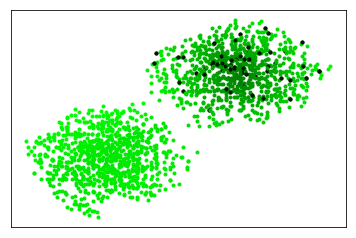

In [54]:
# Not Normalized, but here not possible, as it has negative values
#plot_custom_clusters_2(c_k_o_i_2, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')

# Normalized
plot_custom_clusters_2(c_k_o_i_2_norm, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')


In [55]:
# Method 3 (Combine both methods)
max_val = np.max(c_k_o_i)
min_val = np.min(c_k_o_i)
c_k_o_i_3 = np.zeros((len(sampled_df),len(clusters_labels)))

for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        c_k_o_i_3[i][j] = (c_k_o_i_norm[i][j] * c_k_o_i_2_norm[i][j])
        

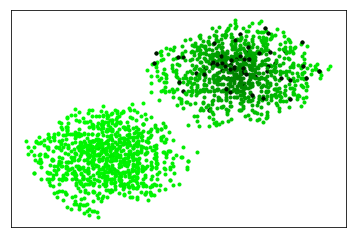

In [56]:
# Normalized
plot_custom_clusters_2(c_k_o_i_3, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result3')


In [57]:
# Method 3 (Combine both methods)
max_val = np.max(c_k_o_i)
min_val = np.min(c_k_o_i)
c_k_o_i_4 = np.zeros((len(sampled_df),len(clusters_labels)))

for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        c_k_o_i_4[i][j] = 2*(c_k_o_i_norm[i][j] * c_k_o_i_2_norm[i][j])/ (c_k_o_i_norm[i][j] + c_k_o_i_2_norm[i][j])
        

In [58]:
len(c_k_o_i_4[c_k_o_i_4 >= 1])

255

## Again Finding Neighbors for Spatial Filters

In [59]:
label_col_name = 'L'
num_neighbors = 7
#num_neighbors = len(select_df)
#print(len(select_df))

In [60]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors, return_distance=False)  

In [61]:
knn.shape

(1883, 7)

In [62]:
row_neighbors_list = {}

for i in range(knn.shape[0]):
    row_neighbors_list[i] = knn[i]
    #print(i, knn[i])

In [63]:
for index in row_neighbors_list:
    #print((row_neighbors_list[index]))
    mylist = row_neighbors_list[index]
    #print("______________")

In [64]:
row_neighbors_list

{0: array([  0, 717, 589, 360, 759,  21, 160]),
 1: array([  1,  81,  13, 234,  30, 822, 455]),
 2: array([ 94,   2, 897, 353, 590, 450, 669]),
 3: array([  3, 850, 869, 329,  68, 123,  71]),
 4: array([212,   4, 286, 651, 106, 359, 507]),
 5: array([  5, 915, 264, 213, 691, 849, 907]),
 6: array([  6, 396, 527, 687,  72,  75, 271]),
 7: array([  7, 875, 637, 647, 641, 557, 167]),
 8: array([  8, 164, 841, 626,  24, 196, 857]),
 9: array([  9, 903, 484, 624, 413, 702, 863]),
 10: array([ 10, 644, 128, 144, 543, 771, 561]),
 11: array([ 11, 772,  97, 344, 825, 767, 307]),
 12: array([408,  12, 285, 539, 801, 449, 266]),
 13: array([ 13, 234,  81,   1,  30,  40, 494]),
 14: array([ 14,  35, 819, 620, 259, 909, 324]),
 15: array([ 15, 452, 251, 154, 577, 483,  48]),
 16: array([ 16, 702,   9, 413, 903, 484, 624]),
 17: array([ 17, 763, 475, 140, 565, 305, 199]),
 18: array([ 18,  83, 134, 465, 186, 302, 602]),
 19: array([ 19, 827, 240, 840, 870, 385, 803]),
 20: array([ 20, 572, 527, 374

In [65]:
def getClustersInside(dataset, c_k_o_i, alpha = 1.0):
    cluster_inside = {}
    cluster_inside = set(cluster_inside)
    dataset['Col2'][0]
    
    clusters_labels = {}
    
    final_list = []
    my_dict = {}
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            if c_k_o_i[i][j] >= alpha:
                #obj = [dataset['Col1'][i], dataset['Col2'][i], j]
                obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_list:
                    final_list.append(obj)
                cluster_inside.add(obj)
                clusters_labels[obj] = j
                
                # Try to keep Maximum Valued Record in a dictionay
                key = (dataset['Col1'][i], dataset['Col2'][i])
                if key in my_dict:
                    if my_dict[key] < c_k_o_i[i][j]:
                        my_dict[key] = c_k_o_i[i][j]
                else:
                    my_dict[key] = c_k_o_i[i][j]

    return clusters_labels, final_list, cluster_inside, my_dict


In [66]:
def getClustersIn_Out_Part(dataset, c_k_o_i, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            if c_k_o_i[i][j] >= alpha:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                #print(c_k_o_i[i][j])
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    #print("Removed... " + str(obj))
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Inside 
                #cluster_inside.add(obj)
                clusters_labels[obj] = j

                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                #Cluster outside 
                #cluster_outside.add(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Partial
                #cluster_partial.add(tuple(obj)) 
 
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

            
    #return cluster_inside, cluster_outside, cluster_partial, final_inside, final_outside, final_partial, dict_inside, dict_outside, dict_partial
    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [67]:
def getClusters_Centroids_MeanDistance(dataset, features_set, label_col_name, knn):
    import math
    
    clusters_labels = np.unique(dataset[label_col_name])        
    clusters_centroids = {}
        
    for i in range(len(clusters_labels)):
        # Get all records of specific cluster
        cluster_dataset = dataset[features_set].loc[dataset[label_col_name] == clusters_labels[i]]
        
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroid = sum_of_cluster/len(cluster_dataset)
        average_distance = 0
        total_distance = 0
        centroid_distances_all = np.zeros(len(cluster_dataset))
        #print("centroid: ", centroid)
        total_average_distances_list = np.zeros(len(cluster_dataset))
        neighbor_distance_list = np.zeros(knn.shape[1])
        j = 0
        for index, o_c in cluster_dataset.iterrows():                                                              
            
            #print("o_c: ", o_c)
            
            centroid_distance = 0
            for col in features_set:
                if col != label_col_name:
                    centroid_distance += (o_c[col] - centroid[col])**2
                    #print(col, ":", (o_c[col] - centroid[col])**2)

            #print("index: ", index)
            for k in range(knn.shape[1]):
                neighbor_distance = 0
                for col in features_set:
                    #print(dataset.iloc[knn[index][k]][col])
                    if col != label_col_name:
                        neighbor_distance += (dataset.iloc[index][col] - dataset.iloc[knn[index][k]][col])**2
            
                neighbor_distance_list[k] =  math.sqrt(neighbor_distance)
                #print(dataset.iloc[knn[index][j]])
            
            centroid_distance = math.sqrt(centroid_distance)
            centroid_distances_all[j] = centroid_distance
            #print(centroid_distance)
            total_distance += centroid_distance
            total_average_distances_list[j] = np.mean(neighbor_distance_list)
            j += 1
        
        #print(total_average_distances_list)
        #print(total_distance)
        average_distance = total_distance/len(cluster_dataset)
        centroid_distance_std = np.std(centroid_distances_all)
        
        total_average_distance = np.sum(total_average_distances_list)
        average_distance_std = np.std(total_average_distances_list)
        average_distance_average = total_average_distance/len(cluster_dataset)
        clusters_centroids[clusters_labels[i]] = (centroid,average_distance,average_distance_average, average_distance_std,centroid_distance_std)
    return clusters_centroids

In [68]:
sampled_df.shape
#print(sampled_df)


(1883, 3)

In [69]:
if select_df_test_flag:
    clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df[sampled_df['Out'] == 1], features, label_col_name, knn)
else:
    clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [70]:
#clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [71]:
print("Centroid,  Average_distance, Average_distance_average,  Average_distance_std")
clusters_centroids

Centroid,  Average_distance, Average_distance_average,  Average_distance_std


{0.0: (Col1    498.254292
  Col2    500.099785
  dtype: float64,
  33.00259988809149,
  2.933954534426787,
  1.2313848932159834,
  15.138790034399042),
 1.0: (Col1    599.447003
  Col2    599.030494
  dtype: float64,
  33.92878615144806,
  2.980361652671304,
  1.2635677880252771,
  16.26585577239152)}

In [72]:
def getEvaluationValues(dataset, dataset_neighbors, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    neighbor_averages_list = [] 
    for index in dataset_neighbors:
        for i in range(num_neighbors):
            dataset_index = dataset_neighbors[index][i]
            cluster_label = sampled_df.iloc[dataset_index]['L']
            c_k_o_i[index][int(cluster_label)] += 1
    
    
    return (c_k_o_i/num_neighbors)

#c_k_o_i = getEvaluationValues(sampled_df, row_neighbors_list, label_col_name)

if select_df_test_flag:
    c_k_o_i = getEvaluationValues(sampled_df[sampled_df['Out'] == 1], row_neighbors_list, label_col_name)
else:
    c_k_o_i = getEvaluationValues(sampled_df, row_neighbors_list, label_col_name)

In [73]:
c_k_o_i.shape

(1883, 2)

In [74]:
ground_truth = {}
    
for i in range(c_k_o_i.shape[0]):
    obj = [] 
    for col in features:
        #obj = (dataset['Col1'][i], dataset['Col2'][i])
        obj.append(sampled_df[col][i])
    obj = tuple(obj)

    ground_truth[obj] = sampled_df['L'][i]

In [75]:
ground_truth

{(500.0, 537.0): 0.0,
 (522.0, 507.0): 0.0,
 (515.0, 500.0): 0.0,
 (509.0, 475.0): 0.0,
 (562.0, 495.0): 0.0,
 (499.0, 549.0): 0.0,
 (512.0, 518.0): 0.0,
 (478.0, 501.0): 0.0,
 (537.0, 488.0): 0.0,
 (485.0, 433.0): 0.0,
 (493.0, 502.0): 0.0,
 (494.0, 515.0): 0.0,
 (522.0, 482.0): 0.0,
 (522.0, 505.0): 0.0,
 (488.0, 461.0): 0.0,
 (522.0, 513.0): 0.0,
 (492.0, 430.0): 0.0,
 (474.0, 526.0): 0.0,
 (485.0, 500.0): 0.0,
 (465.0, 450.0): 0.0,
 (515.0, 516.0): 0.0,
 (496.0, 538.0): 0.0,
 (467.0, 494.0): 0.0,
 (499.0, 499.0): 0.0,
 (533.0, 486.0): 0.0,
 (456.0, 498.0): 0.0,
 (505.0, 537.0): 0.0,
 (515.0, 466.0): 0.0,
 (474.0, 505.0): 0.0,
 (508.0, 547.0): 0.0,
 (520.0, 505.0): 0.0,
 (456.0, 497.0): 0.0,
 (521.0, 488.0): 0.0,
 (501.0, 474.0): 0.0,
 (508.0, 521.0): 0.0,
 (488.0, 460.0): 0.0,
 (541.0, 522.0): 0.0,
 (537.0, 514.0): 0.0,
 (505.0, 471.0): 0.0,
 (512.0, 457.0): 0.0,
 (522.0, 503.0): 0.0,
 (494.0, 512.0): 0.0,
 (519.0, 489.0): 0.0,
 (475.0, 479.0): 0.0,
 (526.0, 524.0): 0.0,
 (487.0, 4

In [76]:
import random
colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']

for each in np.linspace(0, 1, num_of_clusters, retstep=False):
    colors.append(plt.cm.Spectral(each))

colors.append('black')
print("Clusters: ", num_of_clusters)
print("Colors: ", len(colors))


Clusters:  2
Colors:  11


In [77]:
alpha = 0.5
beta = 0

Total Inside:  1748
Total Outside:  0
Total Partial:  3


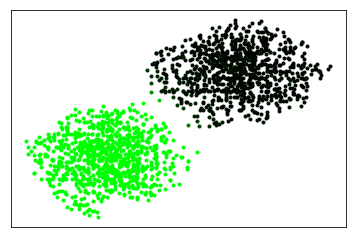

In [78]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta, not_outlier=True)

if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i, alpha, beta, not_outlier=True)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta, not_outlier=True)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Result without Evaluation: ", folder_name + '/' + identity_name + '-hdbscan-without-outliers')
plot_custom_clusters_2(c_k_o_i, clusters_labels, 5, "Result without Evaluation: ", folder_name + '/' + identity_name + '-hdbscan-without-outliers')


In [79]:
alpha = 1
beta = 0

In [80]:
import operator
import math

In [81]:
#Update Nearest Neighbor Evaluation Values By Applying Distance based on 3*Sigma + Mean
def getUpdatedEvaluation(dataset, clusters_labels, dataset_neighbors, clusters_centroids, c_k_o_i, features_set):
    
    clusters_labels = np.unique(dataset[label_col_name])        
    
    count_fringe = 0
    for index, o_c in dataset.iterrows():
        total_distance = 0
        for i in range(num_neighbors):
            distance = 0
            neighbor_index = dataset_neighbors[index][i]
            neighbor_obj = dataset.iloc[neighbor_index]

            for col in features_set:
                if col != label_col_name:
                    distance += (neighbor_obj[col] - o_c[col])**2

            distance = math.sqrt(distance)
            total_distance += distance 


        neighbor_average = total_distance/num_neighbors
        cluster_label = dataset.iloc[index]['L']
        cluster_average = clusters_centroids[cluster_label][1]
        cluster_average_average = clusters_centroids[cluster_label][2]
        cluster_average_std = clusters_centroids[cluster_label][3]
        
        #print("neighbor_average: ",neighbor_average)
        #print("cluster_average_average: ", cluster_average_average)
        #print("cluster_average: ", cluster_average)
        #if (sigma_multiples*neighbor_average) > cluster_average:
        #print("1: ", neighbor_average)
        #print(sigma_multiples*cluster_average_std + cluster_average_average)
        #print("cluster_average_std: ", cluster_average_std)
        
        #Code to set evaluation value score based on 3*Sigma + Mean rule
        if (neighbor_average) > (sigma_multiples*cluster_average_std + cluster_average_average):
            #print("sigma_multiples*cluster_average_std + cluster_average_average: ", sigma_multiples*cluster_average_std + cluster_average_average)
            count_fringe += 1
            cluster_label = dataset.iloc[index]['L']
            #c_k_o_i_min_inside[index][int(cluster_label)] = 0
            c_k_o_i[index][int(cluster_label)] = (sigma_multiples*cluster_average_std + cluster_average_average)/neighbor_average
    
    #print(count_fringe)
    return c_k_o_i


In [82]:
#print(c_k_o_i)

#c_k_o_i = getUpdatedEvaluation(sampled_df, clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)
if select_df_test_flag:
    c_k_o_i = getUpdatedEvaluation(sampled_df[sampled_df['Out'] == 1], clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)
else:
    c_k_o_i = getUpdatedEvaluation(sampled_df, clusters_labels, row_neighbors_list, clusters_centroids, c_k_o_i, features)


In [83]:
#print(c_k_o_i)

In [84]:
#Applying Spatial Filters to Get New Evalaution Values

def getUpdatedEvaluationValues(dataset, dataset_neighbors, label_col_name, c_k_o_i, features_set):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    c_k_o_i_mean = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_min = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_max = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_median = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_laplacian = np.zeros((len(dataset),len(clusters_labels)))
    
    #Considering only neighbors of point
    #neighbor_c_k_o_i = np.zeros(num_neighbors)

    #Considering neighbors of point as well as point itself
    neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    
    for cluster_label in clusters_labels:
        for index in row_neighbors_list:
            total_distance= 0
            for i in range(num_neighbors):
                neighbor_index = row_neighbors_list[index][i]
                
                ####################
                distance = 0
                neighbor_obj = dataset.iloc[neighbor_index]
                o_c = dataset.iloc[index]
                
                for col in features_set:
                    if col != label_col_name:
                        distance += (neighbor_obj[col] - o_c[col])**2

                distance = math.sqrt(distance)
                
                average_distance = clusters_centroids[cluster_label][1]
                centroid_distance_std = clusters_centroids[cluster_label][4]
                
                cluster_average_average = clusters_centroids[cluster_label][2]
                cluster_average_std = clusters_centroids[cluster_label][3]
                
                #Code to consider only those neighbors which are in specific radius
                '''
                if distance > (sigma_multiples*cluster_average_std + cluster_average_average):
                    #print("distance", distance)
                    #print("cluster_average_std", cluster_average_std)
                    #print("cluster_average_average", cluster_average_average)
                    #print("3*sigma + Mean", sigma_multiples*cluster_average_std + cluster_average_average)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                '''
                #Code to consider only those neighbors which are in specific radius based on centroid distance
                
                '''
                if distance > (sigma_multiples*centroid_distance_std + average_distance):
                    print("distance", distance)
                    print("centroid_distance_std", centroid_distance_std)
                    print("average_distance", average_distance)
                    print("3*sigma + Mean", sigma_multiples*centroid_distance_std + average_distance)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                else:
                    neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                '''
                
                # Code not consider radius for neighbors
                neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                
                total_distance += distance

            #Considering neighbors of point as well as point itself
            neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]
            
            #neighbor_c_k_o_i = np.sort(neighbor_c_k_o_i)
            
            c_k_o_i_mean[index][int(cluster_label)] =  np.mean(neighbor_c_k_o_i)
            c_k_o_i_min[index][int(cluster_label)] =  np.nanmin(neighbor_c_k_o_i)
            c_k_o_i_max[index][int(cluster_label)] =  np.nanmax(neighbor_c_k_o_i)
            c_k_o_i_median[index][int(cluster_label)] =  np.median(neighbor_c_k_o_i)
            
            laplacian_value = np.sum(neighbor_c_k_o_i[0:num_neighbors]) - neighbor_c_k_o_i[num_neighbors]*(num_neighbors)
            c_k_o_i_laplacian[index][int(cluster_label)] = (laplacian_value-(-num_neighbors))/(num_neighbors-(-num_neighbors))
            
            #print(neighbor_c_k_o_i)
            #print("Mean", np.mean(neighbor_c_k_o_i))
            #print("Min", np.nanmin(neighbor_c_k_o_i))
            #print("Max", np.nanmax(neighbor_c_k_o_i))
            #print("Median", np.median(neighbor_c_k_o_i))
            #print("Laplacian", c_k_o_i_laplacian[index][int(cluster_label)])            
    
    return c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian

In [85]:
row_neighbors_list

{0: array([  0, 717, 589, 360, 759,  21, 160]),
 1: array([  1,  81,  13, 234,  30, 822, 455]),
 2: array([ 94,   2, 897, 353, 590, 450, 669]),
 3: array([  3, 850, 869, 329,  68, 123,  71]),
 4: array([212,   4, 286, 651, 106, 359, 507]),
 5: array([  5, 915, 264, 213, 691, 849, 907]),
 6: array([  6, 396, 527, 687,  72,  75, 271]),
 7: array([  7, 875, 637, 647, 641, 557, 167]),
 8: array([  8, 164, 841, 626,  24, 196, 857]),
 9: array([  9, 903, 484, 624, 413, 702, 863]),
 10: array([ 10, 644, 128, 144, 543, 771, 561]),
 11: array([ 11, 772,  97, 344, 825, 767, 307]),
 12: array([408,  12, 285, 539, 801, 449, 266]),
 13: array([ 13, 234,  81,   1,  30,  40, 494]),
 14: array([ 14,  35, 819, 620, 259, 909, 324]),
 15: array([ 15, 452, 251, 154, 577, 483,  48]),
 16: array([ 16, 702,   9, 413, 903, 484, 624]),
 17: array([ 17, 763, 475, 140, 565, 305, 199]),
 18: array([ 18,  83, 134, 465, 186, 302, 602]),
 19: array([ 19, 827, 240, 840, 870, 385, 803]),
 20: array([ 20, 572, 527, 374

#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)
if select_df_test_flag:
    c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df[sampled_df['Out'] == 1], row_neighbors_list, label_col_name, c_k_o_i, features)
else:
    c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)


In [89]:
# Normal
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)

# Method 1: Nearest in C / Nearest Not in C
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_norm, features)

# Method 2: Nearest in C / Farthest in C
c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_2_norm, features)

In [90]:
print(len(c_k_o_i_min[c_k_o_i_min  == 1]))
print(len(c_k_o_i_max[c_k_o_i_max  == 1]))
print(len(c_k_o_i_mean[c_k_o_i_mean == 1]))

print(len(c_k_o_i[c_k_o_i == 1]))

0
856
0
255


In [91]:
write_to_file('../Files/sampled_df.csv', np.array(sampled_df))
write_to_file('../Files/c_k_o_i.csv', c_k_o_i)
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)
write_to_file('../Files/c_k_o_i_min.csv', c_k_o_i_min)
write_to_file('../Files/c_k_o_i_max.csv', c_k_o_i_max)
write_to_file('../Files/c_k_o_i_median.csv', c_k_o_i_median)
write_to_file('../Files/c_k_o_i_laplacian.csv', c_k_o_i_laplacian)

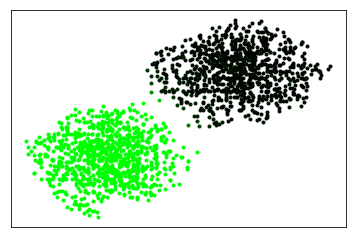

In [92]:
plot_custom_clusters_2(c_k_o_i, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


In [93]:
print(len(c_k_o_i[c_k_o_i == 1]))
print(len(c_k_o_i_norm[c_k_o_i_norm == 1]))
print(len(c_k_o_i_min[c_k_o_i_min == 1]))
print(len(c_k_o_i_max[c_k_o_i_max == 1]))

255
255
0
856


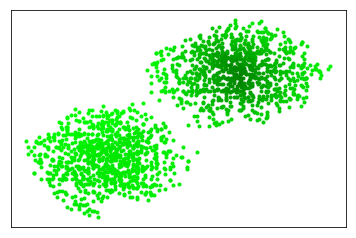

In [94]:
plot_custom_clusters_2(c_k_o_i_min, clusters_labels, 5, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result2')

In [95]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Normal Evaluation: ", folder_name + '/3-' + identity_name)

Total Inside:  123
Total Outside:  0
Total Partial:  1628


In [96]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_mean, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Mean Evaluation: ", folder_name + '/4-' + identity_name)

Total Inside:  0
Total Outside:  0
Total Partial:  1751


In [97]:
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_min, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_min, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result')

Total Inside:  0
Total Outside:  0
Total Partial:  1751


In [98]:
if select_df_test_flag:
    print(select_df_test_out.shape)
print(select_df.shape)
print(sampled_df.shape)

(1883, 2)
(1883, 3)


In [99]:
# Run this Code only if we have Test data in dataset i.e. sampled_df['Out']
def euclidean_distance(row1, row2, features_set):
    distance = 0.0
    for col in features_set:
        if col != label_col_name:
            distance += (row1[col] - row2[col])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(dataset_train, row, row_index, num_neighbors,final_inside):
    distances = list()
    neighbors = list()

    #Code used to count object itself as neighbour of its own
    #distances.append((row_index, row, 0))

    for index, row_dataset_train in dataset_train.iterrows():
        if tuple(row_dataset_train) in final_list:
            dist = euclidean_distance(row, row_dataset_train, features)
            #print(dist)
            distances.append((index, row_dataset_train, dist))

    distances.sort(key=lambda tup: tup[2])
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])        
    return neighbors


def get_testdata_neighbors_list(num_neighbors, final_inside):
    row_neighbors_list_test = {}
    # calculate the Euclidean distance between two vectors
    for index, row in select_df_test.iterrows():
        neighbors = get_neighbors(select_df, row, index, num_neighbors,final_inside)
        row_neighbors_list_test[index] = neighbors
    
    return row_neighbors_list_test


In [100]:
if select_df_test_flag:
    row_neighbors_list_test = get_testdata_neighbors_list(num_neighbors, final_inside)

In [101]:
# Neighborhood based Evaluation Function Score Calculations
if select_df_test_flag:
    c_k_o_i_test = getEvaluationValues(sampled_df, row_neighbors_list_test, label_col_name)
    

In [102]:
# Here we consider all outliers are at the end of the records,
# c_k_o_i_test size include train and test both evaluation, however, train evalation (c_k_o_i) 
# has only not-outliers dataset, so we want the to updated test evaluation c_k_o_i_test, where
# initial records shows normal records while last records shows outliers records.

if select_df_test_flag:
    for i in range(c_k_o_i.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            c_k_o_i_test[i][j] = c_k_o_i[i][j]
        

In [103]:
c_k_o_i.shape[0]

1883

In [104]:
if select_df_test_flag:
    c_k_o_i_test.shape[0]

In [105]:
# Evaluation Function Score Updation based based on "Mean +/- Sigma * 3"
if select_df_test_flag:
    c_k_o_i_test = getUpdatedEvaluation(sampled_df, clusters_labels, row_neighbors_list_test, clusters_centroids, c_k_o_i_test, features, True)
    

In [106]:
if select_df_test_flag:
    print(c_k_o_i_test.shape)
#print(c_k_o_i_test[c_k_o_i_test > 0])

In [107]:
# Evaluation Function Score Updation based based on spatial Filtering

if select_df_test_flag:
    c_k_o_i_mean_test, c_k_o_i_min_test, c_k_o_i_max_test, c_k_o_i_median_test, c_k_o_i_laplacian_test = getUpdatedEvaluationValues(sampled_df, row_neighbors_list_test, label_col_name, c_k_o_i_test, features)
    

In [108]:
if select_df_test_flag:
    print(c_k_o_i_min_test.shape)
#print(c_k_o_i_min_test[c_k_o_i_min_test != 1])


In [109]:
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_min_test, alpha, beta)
    

In [110]:
#write_outliers_detected(final_inside,final_partial,final_outside, file_measures, 'Minimum')

In [111]:
#calculate_db_index(final_inside, clusters_labels, file_measures, 'Minimum')

In [112]:
#calculate_silhouette_score(final_inside, clusters_labels, file_measures, 'Minimum')

In [113]:
#calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures, 'Minimum')

In [114]:
#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures, 'Minimum')

In [115]:
#Blurring = Mean
#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_mean, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Blurred Evaluation: ", folder_name + '/' + identity_name + '-blurred-result')

Total Inside:  0
Total Outside:  0
Total Partial:  1751


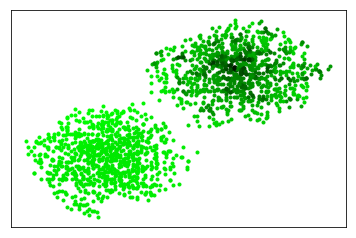

In [120]:
plot_custom_clusters_2(c_k_o_i_mean, clusters_labels, 5, "Blurred Evaluation: ", folder_name + '/' + identity_name + '-blurred-result')

In [121]:
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)

In [122]:
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean_test, alpha, beta)


In [123]:
if select_df_test_flag:        
    print("Blurring and Sharpening based three-way Clustering (BS3WC): ")
    n_count = 0
    outliers_count = 0

    test_range = sampled_df.shape[0] - select_df_test.shape[0]
    test_range_out = sampled_df.shape[0] - select_df_test_out.shape[0]
    n_count = select_df_test_out.shape[0]

    TP = 0 
    FP = 0
    FN = 0
    TN = 0

    for i in range(test_range, sampled_df.shape[0]):
        if i in outliers_indices and i >= test_range_out:
            TP += 1
        elif i not in outliers_indices and i >= test_range_out:
            FN += 1
        elif i in outliers_indices and i < test_range_out:
            FP += 1
        elif i not in outliers_indices and i < test_range_out:
            TN += 1

    print("TP    |    FP    |    FN    |    TN")
    print(TP, ",      ", FP, ",     ", FN, ",      ", TN)

In [124]:
write_outliers_detected(final_inside,final_partial,final_outside, file_measures, 'Blur')

calculate_db_index(final_inside, clusters_labels, file_measures, 'Blur')

calculate_silhouette_score(final_inside, clusters_labels, file_measures, 'Blur')

calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures, 'Blur')

calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

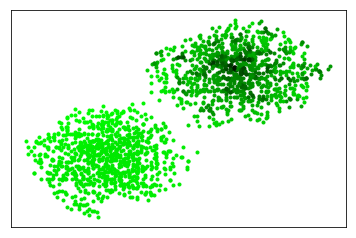

In [125]:
plot_custom_clusters_2(c_k_o_i_mean, clusters_labels, 5, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')


Total Inside:  6


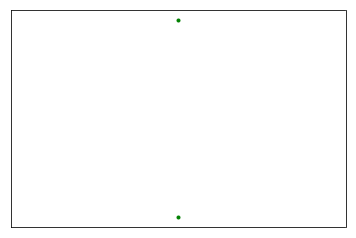

In [126]:
c_k_o_i_inside = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        #if c_k_o_i_mean[i][j] == 1:
        if c_k_o_i_mean[i][j] >= 0.9:
            c_k_o_i_inside[i][j] = 1

alpha = 1
clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_inside, alpha)
print("Total Inside: ",  len(c_k_o_i_inside[c_k_o_i_inside == 1]))

#final_inside.append((4,6))
#clusters_labels[(4,6)] = 1

plot_custom_clusters(final_inside, clusters_labels, 5, colors, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')
#plot_custom_clusters_2(c_k_o_i_mean, clusters_labels, 5, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))


In [127]:
c_k_o_i_diff = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        #c_k_o_i_diff[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]
        c_k_o_i_diff[i][j] = c_k_o_i_norm[i][j] - c_k_o_i_mean[i][j]

Total Inside:  1751
Total Outside:  0
Total Partial:  0


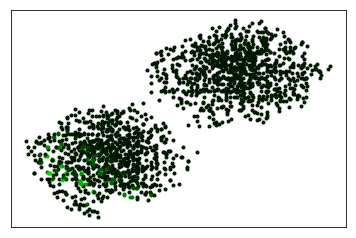

In [128]:
#Sharp Image = Original + Difference
c_k_o_i_sharp = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        #c_k_o_i_sharp[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]
        c_k_o_i_sharp[i][j] = c_k_o_i_norm[i][j] + c_k_o_i_diff[i][j]
        if c_k_o_i_sharp[i][j] > 1:
            c_k_o_i_sharp[i][j] = 1

#clusters_labels, final_inside, final_outside, final_partial = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, alpha, beta)
if select_df_test_flag:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df[sampled_df['Out'] == 1], c_k_o_i_sharp, alpha, beta)
else:
    clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, alpha, beta)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

final_list = final_inside + final_partial + final_outside
#plot_custom_clusters(final_list, clusters_labels, 5, colors, "Sharpe Evaluation: ", folder_name + '/' + identity_name + '-sharpe-result')
plot_custom_clusters_2(c_k_o_i_sharp, clusters_labels, 5, "Sharpe Evaluation: ", folder_name + '/' + identity_name + '-sharpe-result')


Total Inside:  3332


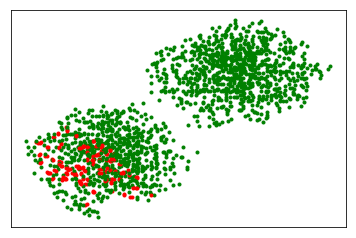

In [129]:
c_k_o_i_inside = np.zeros((c_k_o_i.shape[0],c_k_o_i.shape[1]))
for i in range(c_k_o_i.shape[0]):
    for j in range(c_k_o_i.shape[1]):
        #if c_k_o_i_sharp[i][j] >= 1:
        if c_k_o_i_sharp[i][j] >= 0.9:
            c_k_o_i_inside[i][j] = 1

alpha = 1
clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_inside, alpha)
print("Total Inside: ",  len(c_k_o_i_inside[c_k_o_i_inside == 1]))

#final_inside.append((4,6))
#clusters_labels[(4,6)] = 1

plot_custom_clusters(final_inside, clusters_labels, 5, colors, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))


In [130]:
if select_df_test_flag:        
    c_k_o_i_diff_test = np.zeros((sampled_df.shape[0],sampled_df.shape[1]))
    for i in range(c_k_o_i_test.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            if c_k_o_i_test < c_k_o_i.shape[0]:
                c_k_o_i_diff_test[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]
            else:
                c_k_o_i_diff_test[i][j] = c_k_o_i_test[i][j] - c_k_o_i_mean_test[i][j]

    c_k_o_i_sharp_test = np.zeros((sampled_df.shape[0],sampled_df.shape[1]))
    for i in range(c_k_o_i_test.shape[0]):
        for j in range(c_k_o_i_test.shape[1]):
            if c_k_o_i_test < c_k_o_i.shape[0]:
                c_k_o_i_sharp_test[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]
            else:
                 c_k_o_i_sharp_test[i][j] = c_k_o_i_test[i][j] + c_k_o_i_diff_test[i][j]   

    if select_df_test_flag:
        clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp_test, alpha, beta)



In [131]:
if select_df_test_flag:        
    print("Blurring and Sharpening based three-way Clustering (BS3WC): ")
    n_count = 0
    outliers_count = 0

    test_range = sampled_df.shape[0] - select_df_test.shape[0]
    test_range_out = sampled_df.shape[0] - select_df_test_out.shape[0]
    n_count = select_df_test_out.shape[0]

    TP = 0 
    FP = 0
    FN = 0
    TN = 0

    for i in range(test_range, sampled_df.shape[0]):
        if i in outliers_indices and i >= test_range_out:
            TP += 1
        elif i not in outliers_indices and i >= test_range_out:
            FN += 1
        elif i in outliers_indices and i < test_range_out:
            FP += 1
        elif i not in outliers_indices and i < test_range_out:
            TN += 1

    print("TP    |    FP    |    FN    |    TN")
    print(TP, ",      ", FP, ",     ", FN, ",      ", TN)

In [132]:
write_outliers_detected(final_inside,final_partial,final_outside, file_measures, 'Sharpe')

In [133]:
calculate_db_index(final_inside, clusters_labels, file_measures, 'Sharpe')

DB Index Score (Sharpe): 0.9941



In [134]:
calculate_silhouette_score(final_inside, clusters_labels, file_measures, 'Sharpe')

Silhouette Coefficient (Sharpe): 0.0923


In [135]:
calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures, 'Sharpe')

Accuracy Score (Sharpe): 0.6099


In [136]:
calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Sharpe')

Normalized Mutual Information (Sharpe): 0.1544


In [137]:
calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Sharpe')

Adjusted Random Index (Sharpe): 0.0480


In [138]:
# Pythono3 code to rename multiple files in a directory or folder 
# importing os module 
import os 
path = "/home/baharali/PhD-Image-Conversions/2. BS3WC/images/"
for count, filename_old in enumerate(os.listdir(path)): 
    #dst ="Hostel" + str(count) + ".jpg"
    if 'txt' in filename_old:
        src = path + filename_old 
        dst = path + filename_old.replace('-txt','') 
        os.rename(src, dst) 
        #print(src)
        #print(dst)
        